   null  branch                  
0     2      48  SIRwhiteN_forced
1     0      50    SIRenvN_forced
2     3      47    SIRdemN_forced
3    12      38       SEIR_forced
4     0      35      COVID_forced
5    29      21    SIRwhiteN_null
6    48       2      SIRenvN_null
7    34      16      SIRdemN_null
8    27      23         SEIR_null
9    17      18        COVID_null
   null  branch                  
0     2      48  SIRwhiteN_forced
1     0      50    SIRenvN_forced
2     7      43    SIRdemN_forced
3    14      36       SEIR_forced
4     0      35      COVID_forced
5    50       0    SIRwhiteN_null
6    50       0      SIRenvN_null
7    46       4      SIRdemN_null
8    50       0         SEIR_null
9     4      31        COVID_null
   fold  hopf  branch  null                  
0    25     0      25     0  SIRwhiteN_forced
1     5    12      33     0    SIRenvN_forced
2     6     1      43     0    SIRdemN_forced
3     7     0      43     0       SEIR_forced
4     1    15       6 

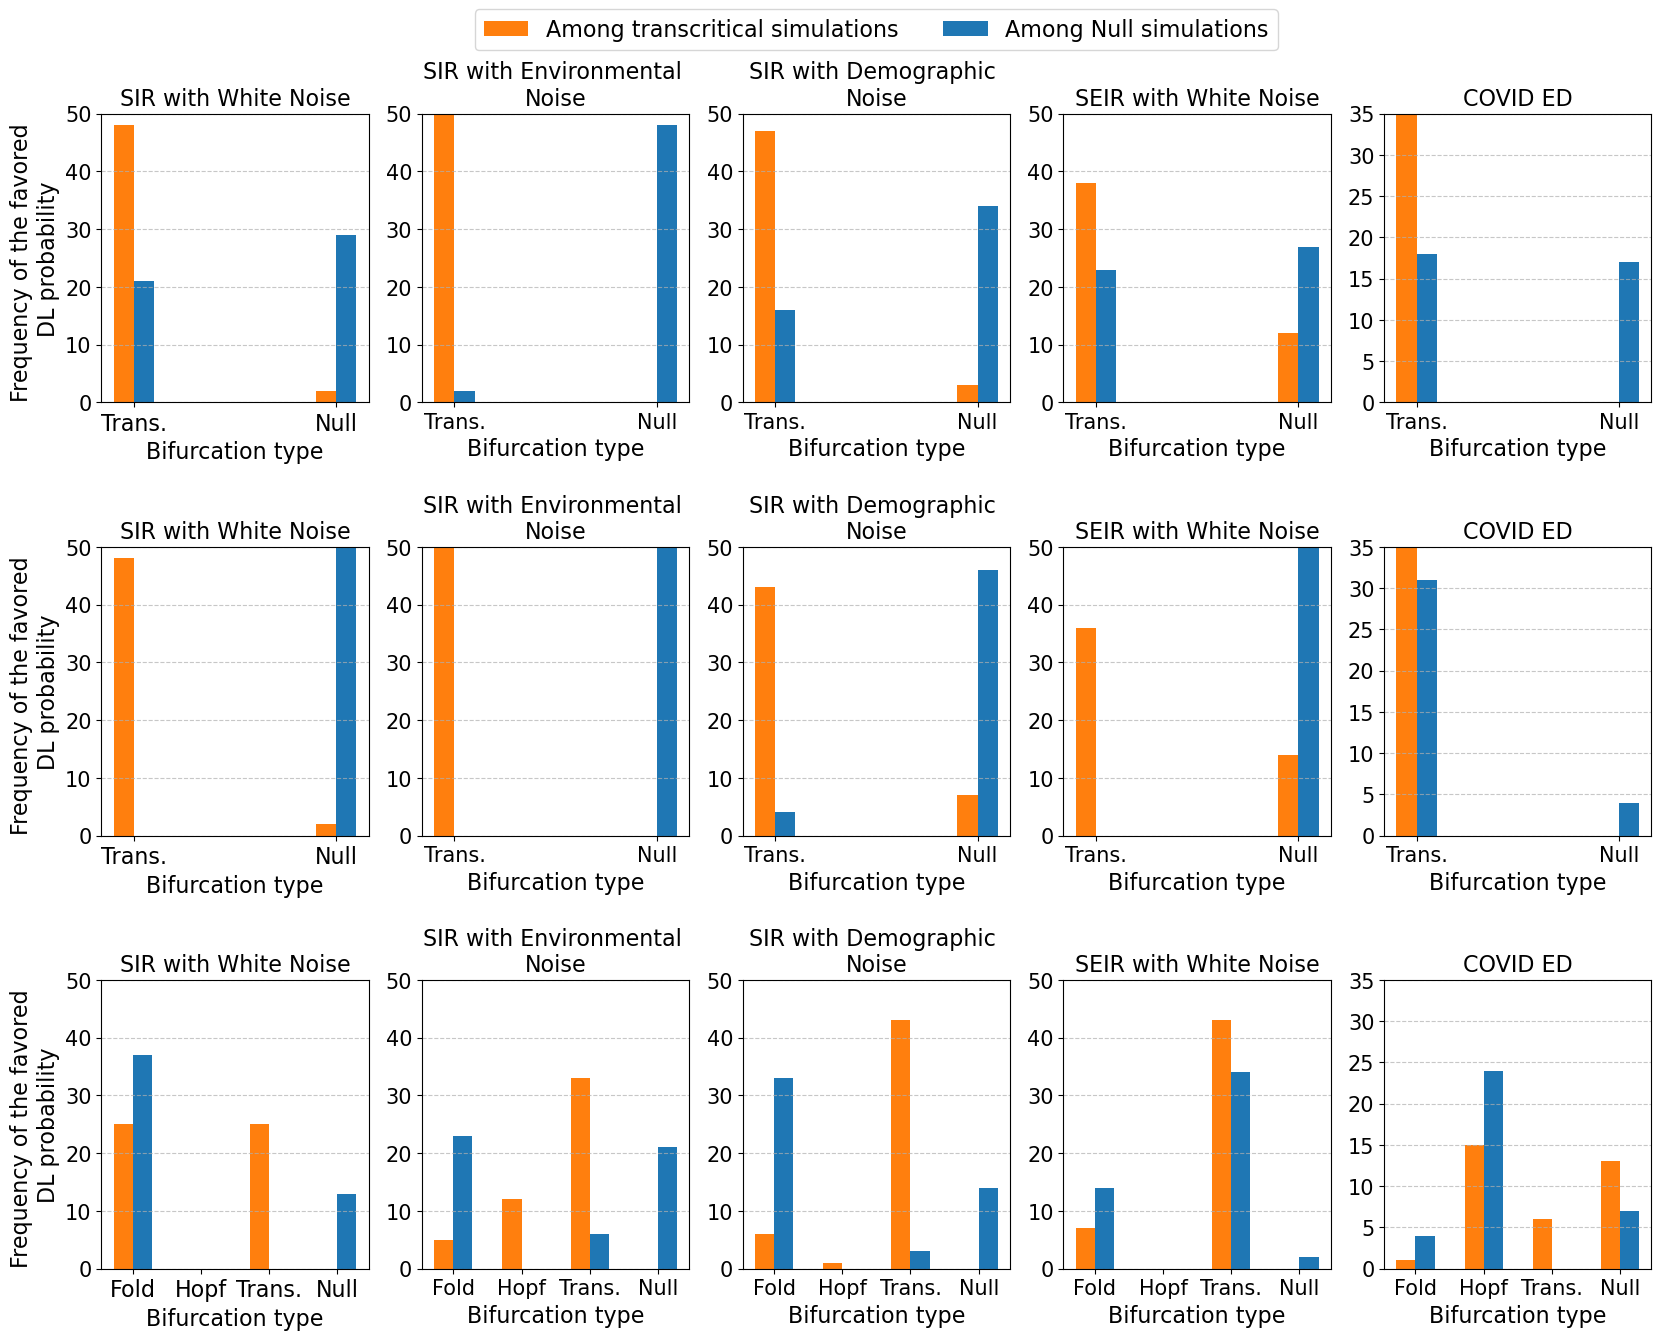

In [3]:
'''
Barplot of last 5 frequency of the test models observed from 
the output of SIR data trained model and Bury et al trained model.
Shown in figure-4.
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import scipy.stats as stats
import os


#import save data of frequency
df = pd.DataFrame()
df_100 = pd.DataFrame()
df_Bury = pd.DataFrame()

test_models = ['SIRwhiteN', 'SIRenvN', 'SIRdemN', 'SEIR', 'COVID']
types = ['forced', 'null']

for type in types: 
    for test_model in test_models: 
        df_temp_100 = pd.read_csv(r'../data/roc/df_bif_pred_counts_{}_late_SIR_trained_{}_CL100.csv'.format(type, test_model)) 
        df_temp_100[''] = test_model + '_' + type
        df_100 = pd.concat([df_100, df_temp_100], ignore_index=True)


for type in types: 
    for test_model in test_models: 
        df_temp = pd.read_csv(r'../data/roc/df_bif_pred_counts_{}_late_SIR_trained_{}_CL500.csv'.format(type, test_model)) 
        df_temp[''] = test_model + '_' + type
        df = pd.concat([df, df_temp], ignore_index=True)

for type in types: 
    for test_model in test_models: 
        df_temp = pd.read_csv(r'../data/roc/df_bif_pred_counts_{}_Bury_late_{}.csv'.format(type, test_model)) 
        df_temp[''] = test_model + '_' + type
        df_Bury = pd.concat([df_Bury, df_temp], ignore_index=True)

print(df_100)        
print(df)
print(df_Bury)

df_100.drop(df_100.iloc[:, 2:3], inplace=True, axis=1)
df_100 = df_100[['branch', 'null']]

df.drop(df.iloc[:, 2:3], inplace=True, axis=1)
df = df[['branch', 'null']]

df_Bury.drop(df_Bury.iloc[:, 4:5], inplace=True, axis=1)


### plot SIR model output frequency
plt.figure(figsize=(20, 15))
bar_width = 0.1

X = ['Trans.','Null'] 
index = np.arange(len(X)) 

#SIDATR-100
plt.subplot(351)
plt.bar(index - bar_width/2, df_100.iloc[0], bar_width, color = 'tab:orange', label = 'Among transcritical simulations') 
plt.bar(index + bar_width/2, df_100.iloc[5], bar_width, color = 'tab:blue', label = 'Among Null simulations') 
plt.xticks(index, X, fontsize=16) 
plt.xlabel('Bifurcation type', fontsize=16)
plt.ylabel('Frequency of the favored \nDL probability', fontsize=16)
plt.title('SIR with White Noise', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(index, X)
plt.ylim(0, 50)
plt.yticks(fontsize=15)
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=11)

plt.subplot(352)
plt.bar(index - bar_width/2, df_100.iloc[1], bar_width, color = 'tab:orange', label = 'Among transcritical simulations') 
plt.bar(index + bar_width/2, df_100.iloc[6], bar_width, color = 'tab:blue', label = 'Among Null simulations') 
plt.xticks(index, X) 
plt.xlabel('Bifurcation type', fontsize=16)
# plt.ylabel('Frequency')
plt.title('SIR with Environmental \nNoise', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(index, X , fontsize=15)
plt.ylim(0, 50)
plt.yticks(fontsize=15)
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=11)

plt.subplot(353)
plt.bar(index - bar_width/2, df_100.iloc[2], bar_width, color = 'tab:orange', label = 'Among transcritical simulations') 
plt.bar(index + bar_width/2, df_100.iloc[7], bar_width, color = 'tab:blue', label = 'Among Null simulations') 
plt.xticks(index, X) 
plt.xlabel('Bifurcation type', fontsize=16)
# plt.ylabel('Frequency')
plt.title('SIR with Demographic \nNoise', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(index, X , fontsize=15)
plt.ylim(0, 50)
plt.yticks(fontsize=15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), ncol=2, fontsize=16)
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=11)

plt.subplot(354)
plt.bar(index - bar_width/2, df_100.iloc[3], bar_width, color = 'tab:orange', label = 'Among \nTranscritical \nsimulations') 
plt.bar(index + bar_width/2, df_100.iloc[8], bar_width, color = 'tab:blue', label = 'Among \nNull \nsimulations') 
plt.xticks(index, X) 
plt.xlabel('Bifurcation type', fontsize=16)
# plt.ylabel('Frequency')
plt.title('SEIR with White Noise', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(index, X , fontsize=15)
plt.ylim(0, 50)
plt.yticks(fontsize=15)

plt.subplot(355)
plt.bar(index - bar_width/2, df_100.iloc[4], bar_width, color = 'tab:orange', label = 'Among \nTranscritical \nsimulations') 
plt.bar(index + bar_width/2, df_100.iloc[9], bar_width, color = 'tab:blue', label = 'Among \nNull \nsimulations') 
plt.xticks(index, X) 
plt.xlabel('Bifurcation type', fontsize=16)
# plt.ylabel('Frequency')
plt.title('COVID ED', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(index, X , fontsize=15)
plt.ylim(0, 35)
plt.yticks(fontsize=15)


##SIDATR-500

plt.subplot(356)
plt.bar(index - bar_width/2, df.iloc[0], bar_width, color = 'tab:orange', label = 'Among transcritical simulations') 
plt.bar(index + bar_width/2, df.iloc[5], bar_width, color = 'tab:blue', label = 'Among Null simulations') 
plt.xticks(index, X, fontsize=16) 
plt.xlabel('Bifurcation type', fontsize=16)
plt.ylabel('Frequency of the favored \nDL probability', fontsize=16)
plt.title('SIR with White Noise', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(index, X)
plt.ylim(0, 50)
plt.yticks(fontsize=15)
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=11)

plt.subplot(357)
plt.bar(index - bar_width/2, df.iloc[1], bar_width, color = 'tab:orange', label = 'Among transcritical simulations') 
plt.bar(index + bar_width/2, df.iloc[6], bar_width, color = 'tab:blue', label = 'Among Null simulations') 
plt.xticks(index, X) 
plt.xlabel('Bifurcation type', fontsize=16)
# plt.ylabel('Frequency')
plt.title('SIR with Environmental \nNoise', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(index, X , fontsize=15)
plt.ylim(0, 50)
plt.yticks(fontsize=15)
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=11)

plt.subplot(358)
plt.bar(index - bar_width/2, df.iloc[2], bar_width, color = 'tab:orange', label = 'Among transcritical simulations') 
plt.bar(index + bar_width/2, df.iloc[7], bar_width, color = 'tab:blue', label = 'Among Null simulations') 
plt.xticks(index, X) 
plt.xlabel('Bifurcation type', fontsize=16)
# plt.ylabel('Frequency')
plt.title('SIR with Demographic \nNoise', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(index, X , fontsize=15)
plt.ylim(0, 50)
plt.yticks(fontsize=15)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), ncol=2, fontsize=16)
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=11)

plt.subplot(359)
plt.bar(index - bar_width/2, df.iloc[3], bar_width, color = 'tab:orange', label = 'Among \nTranscritical \nsimulations') 
plt.bar(index + bar_width/2, df.iloc[8], bar_width, color = 'tab:blue', label = 'Among \nNull \nsimulations') 
plt.xticks(index, X) 
plt.xlabel('Bifurcation type', fontsize=16)
# plt.ylabel('Frequency')
plt.title('SEIR with White Noise', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(index, X , fontsize=15)
plt.ylim(0, 50)
plt.yticks(fontsize=15)

plt.subplot(3,5,10)
plt.bar(index - bar_width/2, df.iloc[4], bar_width, color = 'tab:orange', label = 'Among \nTranscritical \nsimulations') 
plt.bar(index + bar_width/2, df.iloc[9], bar_width, color = 'tab:blue', label = 'Among \nNull \nsimulations') 
plt.xticks(index, X) 
plt.xlabel('Bifurcation type', fontsize=16)
# plt.ylabel('Frequency')
plt.title('COVID ED', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(index, X , fontsize=15)
plt.ylim(0, 35)
plt.yticks(fontsize=15)


## plot Bury et al model output frequency
# plt.figure(figsize=(15, 5))
bar_width = 0.28

X = ['Fold', 'Hopf', 'Trans.','Null'] 
index = np.arange(len(X)) 
  
plt.subplot(3,5,11)
plt.bar(index - bar_width/2, df_Bury.iloc[0], bar_width, color = 'tab:orange', label = 'Among transcritical simulations') 
plt.bar(index + bar_width/2, df_Bury.iloc[5], bar_width, color = 'tab:blue', label = 'Among Null simulations') 
plt.xticks(index, X, fontsize=16) 
plt.xlabel('Bifurcation type', fontsize=16)
plt.ylabel('Frequency of the favored \nDL probability', fontsize=16)
plt.title('SIR with White Noise', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(index, X)
plt.ylim(0, 50)
plt.yticks(fontsize=15)
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=11)

plt.subplot(3,5,12)
plt.bar(index - bar_width/2, df_Bury.iloc[1], bar_width, color = 'tab:orange', label = 'Among transcritical simulations') 
plt.bar(index + bar_width/2, df_Bury.iloc[6], bar_width, color = 'tab:blue', label = 'Among Null simulations') 
plt.xticks(index, X) 
plt.xlabel('Bifurcation type', fontsize=16)
# plt.ylabel('Frequency')
plt.title('SIR with Environmental \nNoise', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(index, X , fontsize=15)
plt.ylim(0, 50)
plt.yticks(fontsize=15)
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=11)

plt.subplot(3,5,13)
plt.bar(index - bar_width/2, df_Bury.iloc[2], bar_width, color = 'tab:orange', label = 'Among transcritical simulations') 
plt.bar(index + bar_width/2, df_Bury.iloc[7], bar_width, color = 'tab:blue', label = 'Among Null simulations') 
plt.xticks(index, X) 
plt.xlabel('Bifurcation type', fontsize=16)
# plt.ylabel('Frequency')
plt.title('SIR with Demographic \nNoise', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(index, X , fontsize=15)
plt.ylim(0, 50)
plt.yticks(fontsize=15)
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=11)

plt.subplot(3,5,14)
plt.bar(index - bar_width/2, df_Bury.iloc[3], bar_width, color = 'tab:orange', label = 'Among transcritical simulations') 
plt.bar(index + bar_width/2, df_Bury.iloc[8], bar_width, color = 'tab:blue', label = 'Among Null simulations') 
plt.xticks(index, X) 
plt.xlabel('Bifurcation type', fontsize=16)
# plt.ylabel('Frequency')
plt.title('SEIR with White Noise', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(index, X , fontsize=15)
plt.ylim(0, 50)
plt.yticks(fontsize=15)


plt.subplot(3,5,15)
plt.bar(index - bar_width/2, df_Bury.iloc[4], bar_width, color = 'tab:orange', label = 'Among transcritical simulations') 
plt.bar(index + bar_width/2, df_Bury.iloc[9], bar_width, color = 'tab:blue', label = 'Among Null simulations') 
plt.xticks(index, X) 
plt.xlabel('Bifurcation type', fontsize=16)
# plt.ylabel('Frequency')
plt.title('COVID ED', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(index, X , fontsize=15)
plt.ylim(0, 35)
plt.yticks(fontsize=15)


plt.subplots_adjust(hspace=0.5)


plt.savefig(r'../data/figures/fig-3-freq-last-5-pred.png', bbox_inches = 'tight')